# **<center>STOCK PRICE PREDICTION Using Regression and Deep Learning Algorithms</center>**

**Discussed Algorithms:**
  1. Support Vector Regressor
  2. Random Forest Regressor
  3. KNN Regressor
  4. LSTM (Long Short-Term Memory)
  5. GRU (Gated Recurrent Unit)


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')

**Data Ingestion**

In [3]:
 df = yf.download("TCS.NS", start="2018-03-06", end="2023-03-06")
 df=df.round(2)

[*********************100%%**********************]  1 of 1 completed


**Top 5 rows of dataframe**

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-06,1561.00,1563.50,1515.07,1521.40,1341.97,1906764
2018-03-07,1535.00,1544.50,1509.25,1513.72,1335.20,1917772
2018-03-08,1527.45,1527.45,1493.75,1501.97,1324.84,1951826
2018-03-09,1502.50,1531.60,1488.60,1517.05,1338.13,1872436
2018-03-12,1521.50,1541.95,1517.75,1526.07,1346.09,2091340


**Bottom 5 rows of dataframe**

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-27,3390.0,3390.0,3316.0,3331.85,3274.99,1128022
2023-02-28,3328.5,3392.0,3299.9,3312.85,3256.31,4116217
2023-03-01,3323.0,3389.0,3315.0,3385.70,3327.92,1669307
2023-03-02,3361.0,3369.9,3318.0,3321.45,3264.76,1556538
2023-03-03,3354.0,3358.0,3331.1,3342.15,3285.11,1043190


**Shape of the dataframe**

In [6]:
df.shape

(1237, 6)

**List of columns in the dataframe**

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Checking duplicate**

In [8]:
df.duplicated().sum()

0

**Checking Null**

In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Basic information about  the dataframe**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2018-03-06 to 2023-03-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1237 non-null   float64
 1   High       1237 non-null   float64
 2   Low        1237 non-null   float64
 3   Close      1237 non-null   float64
 4   Adj Close  1237 non-null   float64
 5   Volume     1237 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.6 KB


**Basic statistics of the dataframe**

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03
mean,2651.823985,2678.238828,2622.903605,2650.333161,2478.660566,3.084368e+06
std,695.495523,698.730545,690.962083,695.048512,708.069090,3.079334e+06
min,1401.000000,1413.700000,1390.780000,1408.500000,1242.390000,1.445300e+05
25%,2050.000000,2069.500000,2022.000000,2045.250000,1850.630000,1.877447e+06
50%,2330.950000,2359.000000,2320.000000,2331.150000,2182.060000,2.557626e+06
75%,3290.000000,3318.950000,3255.250000,3286.400000,3137.950000,3.537502e+06
max,4033.950000,4043.000000,3980.000000,4019.150000,3819.470000,8.806715e+07


**Checking unique and making Date as index to perform our analysis**

In [12]:
df.nunique()
df['Date'] = df.index

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2018-03-06,1561.00,1563.50,1515.07,1521.40,1341.97,1906764,2018-03-06
2018-03-07,1535.00,1544.50,1509.25,1513.72,1335.20,1917772,2018-03-07
2018-03-08,1527.45,1527.45,1493.75,1501.97,1324.84,1951826,2018-03-08
2018-03-09,1502.50,1531.60,1488.60,1517.05,1338.13,1872436,2018-03-09
2018-03-12,1521.50,1541.95,1517.75,1526.07,1346.09,2091340,2018-03-12
...,...,...,...,...,...,...,...
2023-02-27,3390.00,3390.00,3316.00,3331.85,3274.99,1128022,2023-02-27
2023-02-28,3328.50,3392.00,3299.90,3312.85,3256.31,4116217,2023-02-28
2023-03-01,3323.00,3389.00,3315.00,3385.70,3327.92,1669307,2023-03-01


**Cheking range of date**

In [14]:
print("Starting date: ",df.iloc[0][-1])
print("Ending date: ", df.iloc[-1][-1])
print("Duration: ", df.iloc[-1][-1]-df.iloc[0][-1])

Starting date:  2018-03-06 00:00:00
Ending date:  2023-03-03 00:00:00
Duration:  1823 days 00:00:00


**Creating monthvise data**

In [15]:
monthvise= df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')

In [16]:
monthvise

,Open,Close
Date,,
April,2451.394688,2449.840208
May,2456.331154,2452.379038
March,2475.699406,2479.397921
July,2524.655909,2521.871818
June,2543.075000,2544.039151
August,2653.361165,2657.002913
October,2697.718812,2693.646535
November,2710.269307,2708.071782
September,2743.676961,2740.692647


**Ploting monthvise data**

Text(0.5, 1.0, 'Monthwise comparision between Stock open and close price')

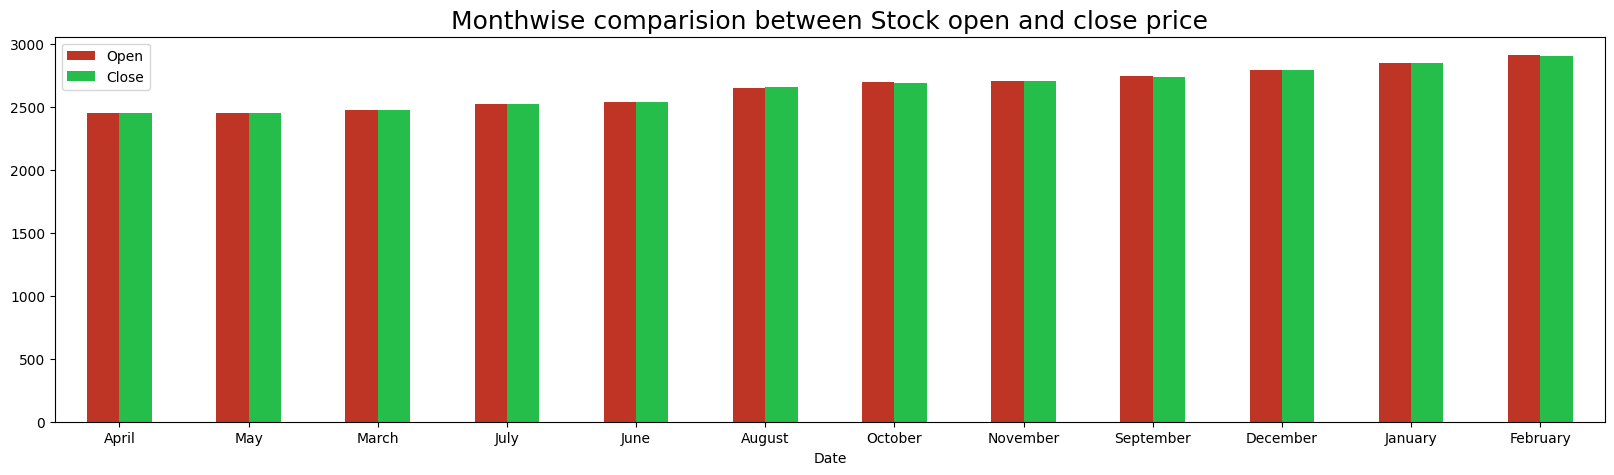

In [17]:
monthvise.plot.bar(rot=0, color={"Open": "#BE3525", "Close":"#25BE4B"},figsize=(20,5))
plt.title("Monthwise comparision between Stock open and close price", fontsize = 18)

**Minimum low price in each month**

In [18]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Date
April        1420.00
August       1945.00
December     1870.25
February     1881.30
January      1808.00
July         1841.10
June         1711.15
March        1390.78
May          1698.35
November     1784.50
October      1784.35
September    1975.00
Name: Low, dtype: float64

**Maximum low price in each month**

In [19]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].max()

Date
April        3772.00
August       3703.45
December     3731.30
February     3816.05
January      3980.00
July         3332.35
June         3431.20
March        3720.20
May          3492.75
November     3542.00
October      3900.00
September    3892.10
Name: Low, dtype: float64

**Minimum high price in each month**

In [20]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].min()

Date
April        1457.0
August       1978.3
December     1909.0
February     1930.0
January      1851.0
July         1857.8
June         1734.9
March        1413.7
May          1735.5
November     1847.6
October      1853.9
September    2061.0
Name: High, dtype: float64

**Maximum high price in each month**

In [21]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].max()

Date
April        3835.60
August       3804.10
December     3760.00
February     3882.50
January      4043.00
July         3374.00
June         3477.30
March        3779.50
May          3547.95
November     3575.55
October      3989.90
September    3981.75
Name: High, dtype: float64

In [22]:
monthvise['monthvise_high']= df.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise['monthvise_low']= df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Text(0.5, 1.0, 'Monthwise High and Low stock price')

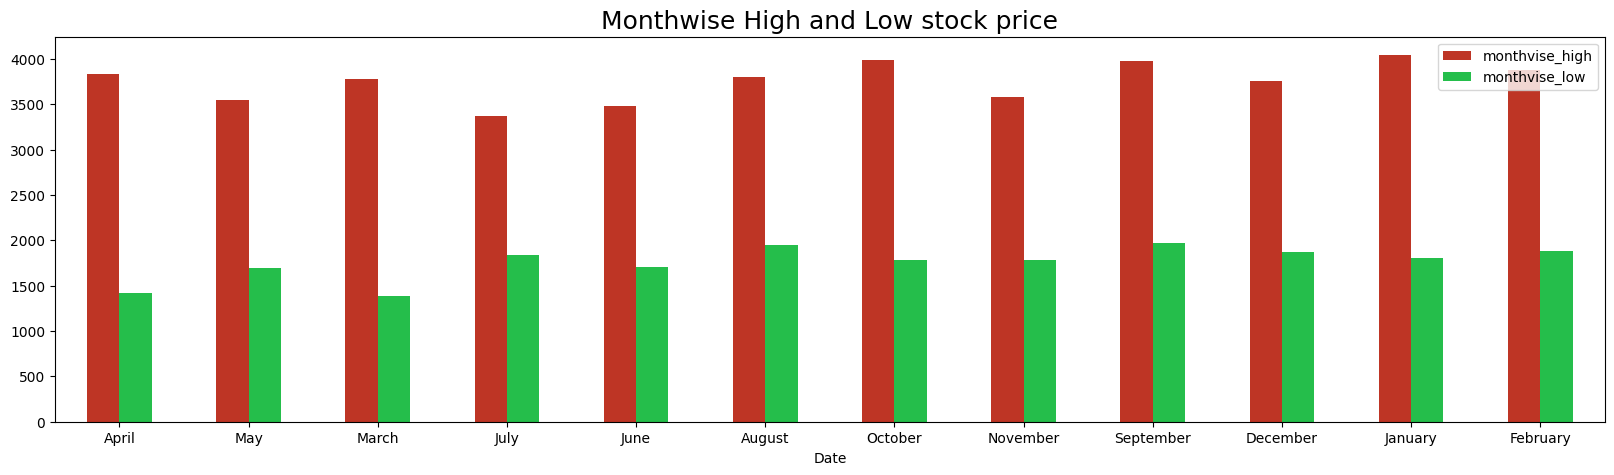

In [23]:
monthvise[['monthvise_high', 'monthvise_low']].plot.bar(rot=0, color={"monthvise_high": "#BE3525", "monthvise_low":"#25BE4B"},figsize=(20,5))
plt.title("Monthwise High and Low stock price", fontsize = 18)

Text(0.5, 1.0, 'Stock analysis chart')

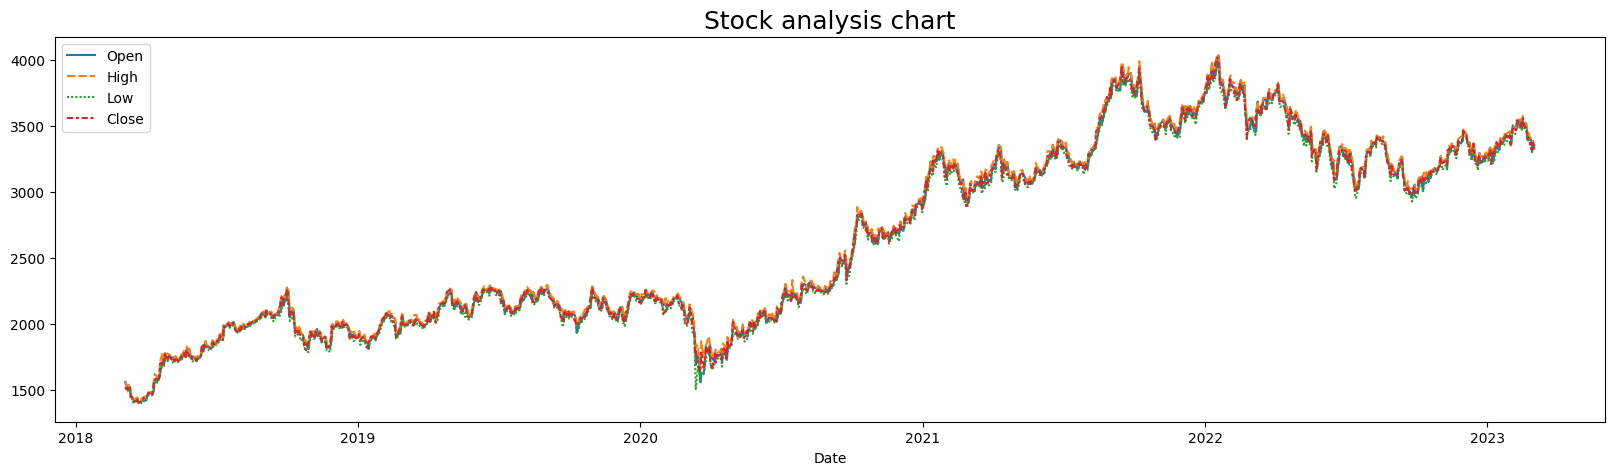

In [24]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[['Open','High','Low','Close']])
plt.title("Stock analysis chart",fontsize=18)

In [25]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1237, 2)


Text(0.5, 1.0, 'Stock close price chart')

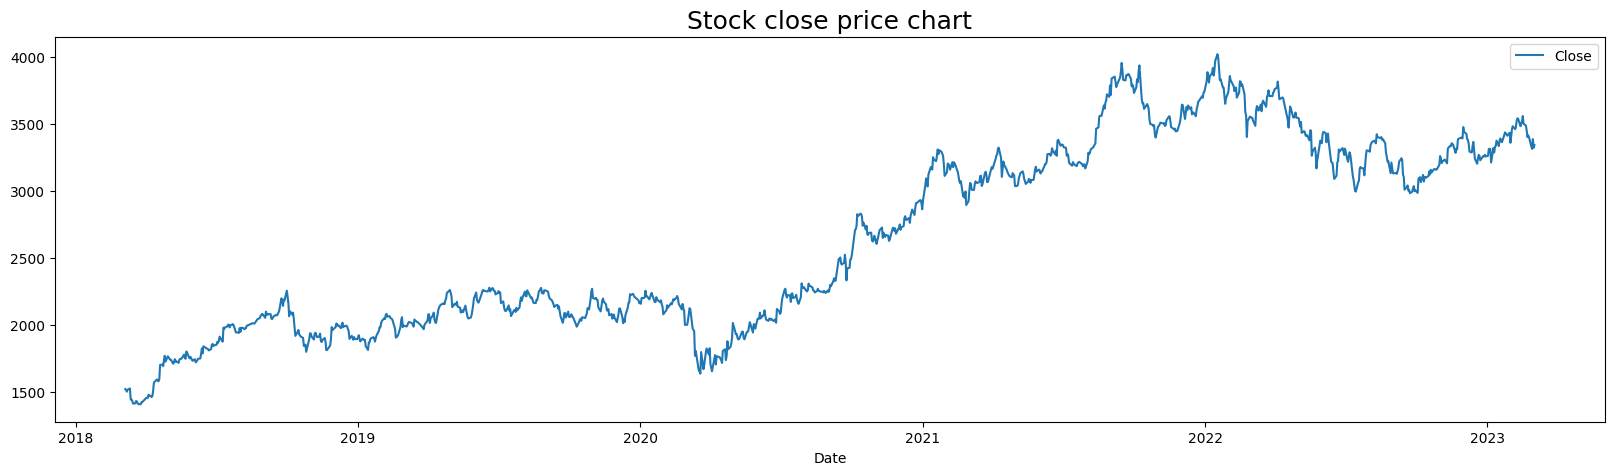

In [26]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart",fontsize=18)

## **Model Creation**

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

#### **Evaluation Metrics**
**mean_squared_error:**
* This is a metric that measures the average squared difference between the predicted and actual values. It is calculated as the mean of the squared differences between the predicted and actual values. This metric is useful for penalizing large errors in the predictions, and is commonly used as a loss function during training. However, it can be sensitive to outliers and does not provide an easily interpretable measure of error in the original units of the response variable.

**mean_absolute_error:** 
* This is a metric that measures the average absolute difference between the predicted and actual values. It is calculated as the mean of the absolute differences between the predicted and actual values. This metric provides an easily interpretable measure of error in the original units of the response variable, and is less sensitive to outliers than the mean squared error.

**explained_variance_score:** 
* This is a metric that measures the proportion of variance in the target variable that is explained by the model. It is calculated as 1 - (variance of residuals / variance of target variable). This metric provides an indication of how well the model fits the data and can be interpreted as the amount of information captured by the model.

**r2_score:**
* This is a metric that measures the proportion of variance in the target variable that is explained by the model, normalized by the total variance in the target variable. It is calculated as 1 - (sum of squared residuals / total sum of squares). This metric provides a normalized indication of how well the model fits the data, and can be interpreted as the percentage of variance in the target variable that is explained by the model. It ranges from 0 to 1, with 1 indicating a perfect fit and values close to 0 indicating poor performance.

**mean_poisson_deviance:**
* It is a metric that measures the goodness of fit of a Poisson regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the observed values. A lower value of this metric indicates a better fit of the model to the data.

**mean_gamma_deviance:**
* It is a metric that measures the goodness of fit of a Gamma regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the observed values. A lower value of this metric indicates a better fit of the model to the data.

**accuracy_score:**
* It is a metric used to evaluate the performance of a classification model. It calculates the proportion of correctly predicted labels to the total number of samples. A higher value of this metric indicates a better classification performance of the model.



In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

#### **Scaling**
**MinMaxScaler:**
* MinMaxScaler is a technique used in data preprocessing to scale and transform features or variables of a dataset to a particular range, usually between 0 and 1. This technique helps to normalize the data and make it more consistent, making it easier to compare and analyze the data.
* MinMaxScaler is a simple linear scaling technique that works by subtracting the minimum value of the feature and then dividing by the range (i.e., the difference between the maximum and minimum values) of the feature. The resulting values are then rescaled to fit within the desired range.
* MinMaxScaler is commonly used in machine learning algorithms, especially in algorithms that involve distance calculations or optimization, such as clustering, gradient descent, and neural networks. It helps to improve the performance of the algorithms by reducing the influence of the scale of the variables on the model.

In [29]:
close_stock = closedf.copy()
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1237, 1)


In [30]:
training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
# print(train_data)
# print(test_data)

train_data:  (927, 1)
test_data:  (310, 1)


In [31]:
# convert an array of values into a dataset matrix
"""
This function creates a sliding window of size time_step over the input dataset and constructs a set of input-output pairs for training a time series forecasting model. 
The input matrix dataX contains n rows, where n is the number of time steps in the input sequence, and time_step columns, representing the past time_step values of the 
input sequence. The output matrix dataY contains n rows and 1 column,representing the next value in the sequence to be predicted.
"""
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (911, 15)
y_train:  (911,)
X_test:  (294, 15)
y_test (294,)


### **Support Vector Regressor**
* Support Vector Regressor (SVR) is a machine learning algorithm used for regression analysis. It is an extension of the popular Support Vector Machine (SVM) algorithm used for classification problems.

* SVR tries to fit a line or a curve through the data points in such a way that the margin between the predicted values and the actual values is minimized. The algorithm does this by identifying the support vectors, which are the data points closest to the line or curve being fitted, and using them to optimize the margin.

* SVR is particularly useful when dealing with nonlinear data, as it is able to transform the data into a higher dimensional space, where it can be more easily separated. It is also highly effective in dealing with noisy data, as it is able to effectively filter out the noise and identify the underlying trends in the data.

* In summary, SVR is a powerful regression algorithm that is highly effective in dealing with nonlinear and noisy data, making it a valuable tool for data scientists and machine learning practitioners.






In [33]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [34]:
# Lets Do the prediction 

train_predict =svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

print(train_predict.shape)
print(test_predict.shape)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

(911,)
(294,)
Train data prediction: (911, 1)
Test data prediction: (294, 1)


In [35]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
print(train_predict.shape)
print(test_predict.shape)
# print(train_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
print(original_ytrain.shape)
print(original_ytest.shape)

(911, 1)
(294, 1)
(911, 1)
(294, 1)


In [36]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  86.25707415322809
Train data MSE:  7440.28284147549
Test data MAE:  67.72630057558143
---------------------------------------------------------------------------------------------------------
Test data RMSE:  111.99275370256149
Test data MSE:  12542.376881882601
Test data MAE:  87.30044486990313
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9802334710192971
Test data explained variance regression score: 0.7940417224063246
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9791485993993814
Test data R2 score: 0.7750220561319056
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.001324578284622196
Test data M

Text(0.5, 1.0, 'Stock close price chart')

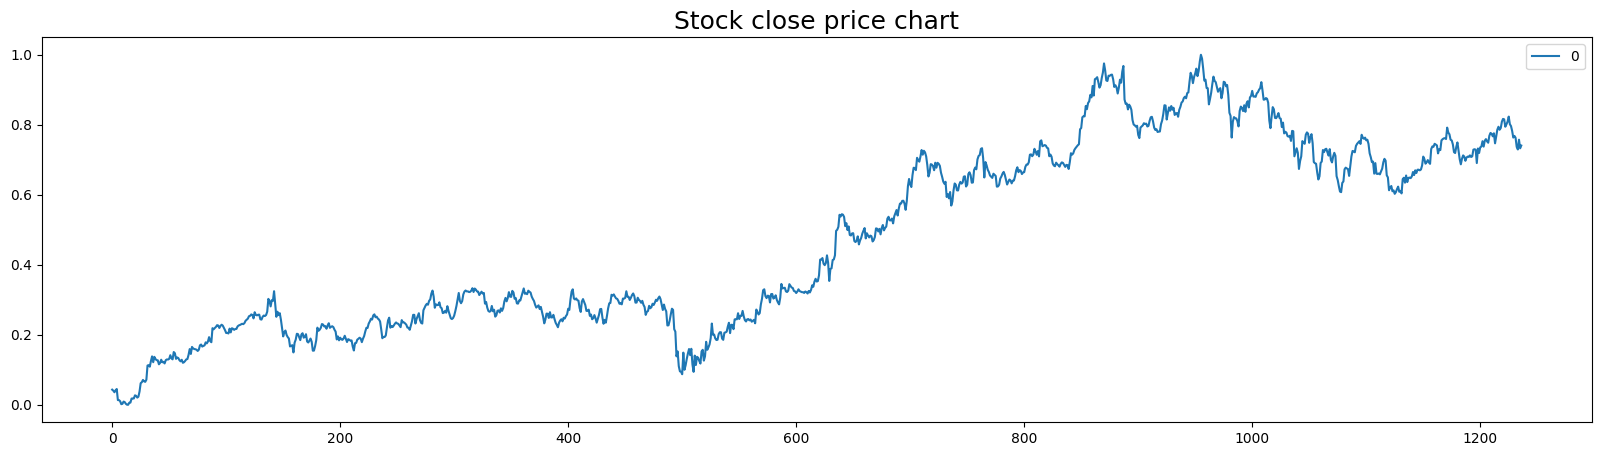

In [37]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart",fontsize=18)

Train predicted data:  (1237, 1)
Test predicted data:  (1237, 1)


Text(0.5, 1.0, 'Stock close price chart')

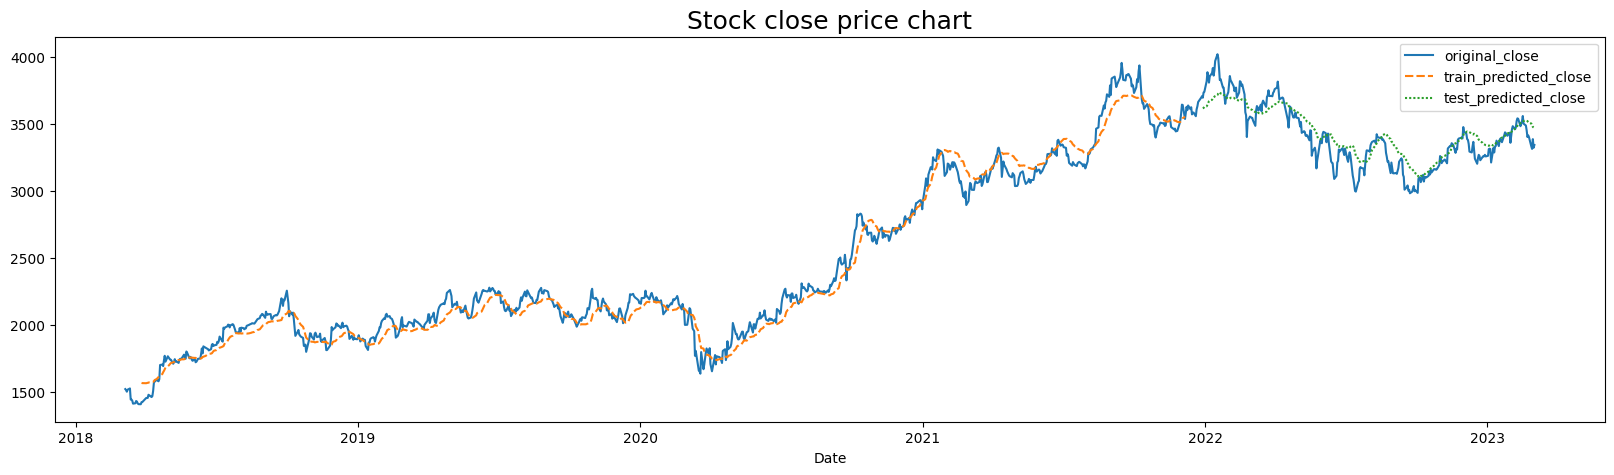

In [38]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})


plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Stock close price chart",fontsize=18)

In [39]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.7943998621033076,
 0.8011797828127095,
 0.8090513856702354,
 0.8233773198245647,
 0.8015819814988604,
 0.7962767893053454,
 0.782372206155555,
 0.7634305632696837,
 0.7681228812747783,
 0.7630092122651445,
 0.7367322314366153,
 0.7294543504491219,
 0.757359278340643,
 0.732748549211882,
 0.7406776090245725]

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.7943998621033076,
 0.8011797828127095,
 0.8090513856702354,
 0.8233773198245647,
 0.8015819814988604,
 0.7962767893053454,
 0.782372206155555,
 0.7634305632696837,
 0.7681228812747783,
 0.7630092122651445,
 0.7367322314366153,
 0.7294543504491219,
 0.757359278340643,
 0.732748549211882,
 0.7406776090245725]

In [41]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.7836405300639786, 0.7852888929031172, 0.7870084624467126, 0.7882721201272821, 0.7884685758764851, 0.7890299326467749, 0.7889916431249511, 0.7901486418670618, 0.7917830502768155, 0.7926437590813386]


In [42]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

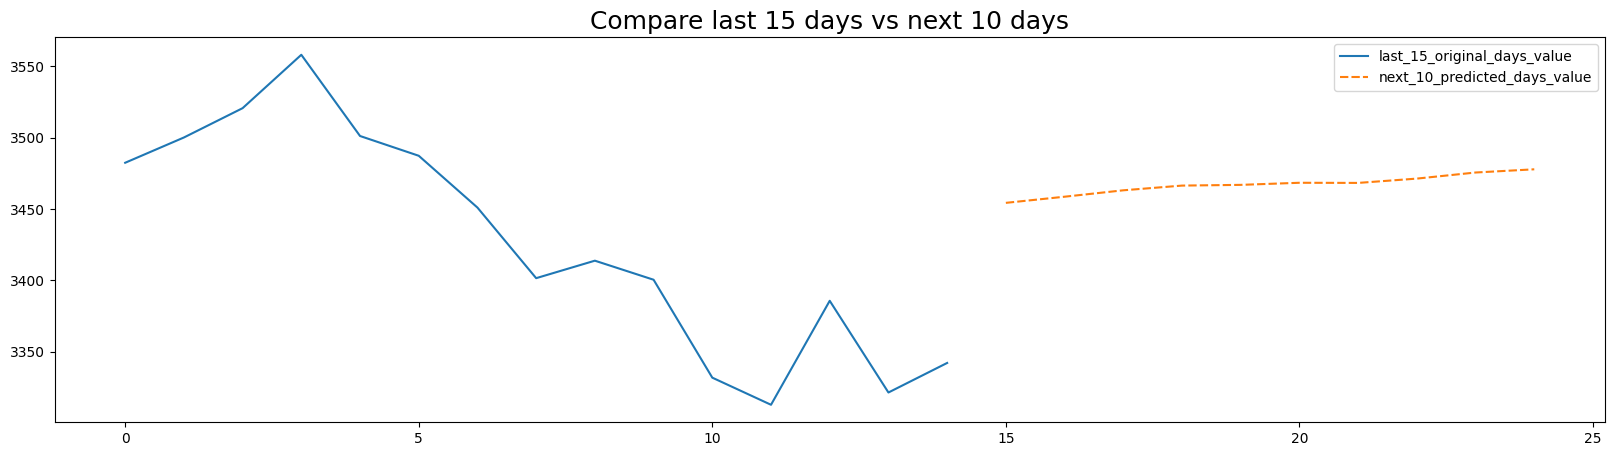

In [43]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})


plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

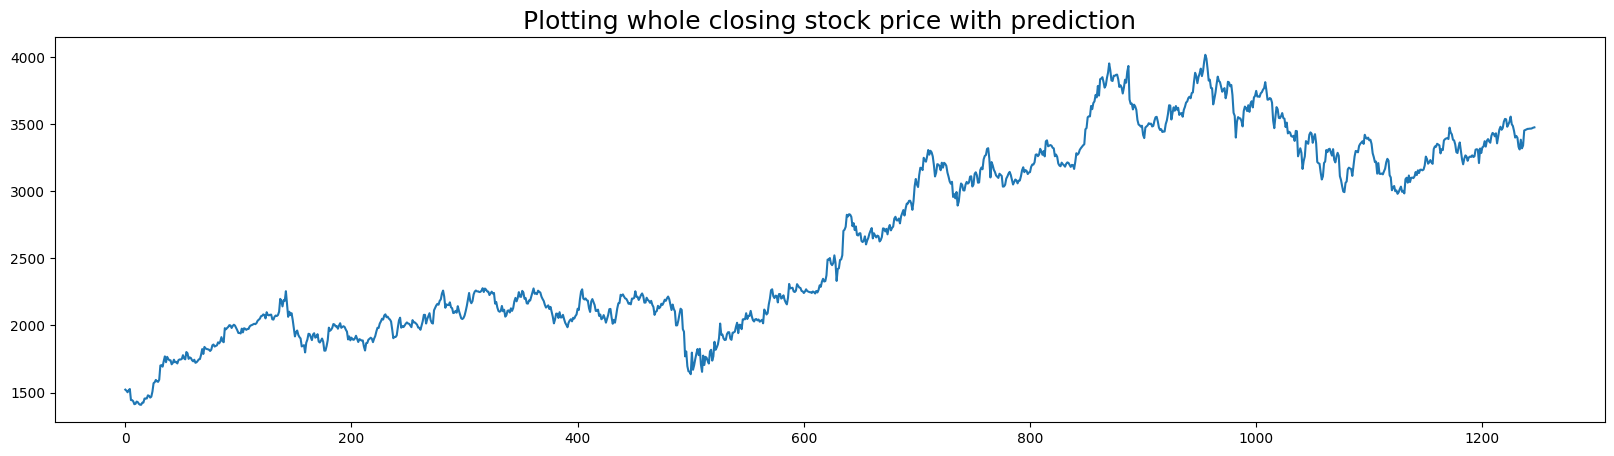

In [44]:
# Creating list of close price
svrdf=closedf.tolist()
# Adding next 10 days prediction
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=svrdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **Random Forest Regressor**
* Random Forest Regressor is a popular machine learning algorithm that is widely used for solving regression problems. This algorithm is based on the concept of decision trees and ensemble learning. The Random Forest Regressor algorithm involves creating a large number of decision trees, and then combining the results of each tree to produce a final prediction.

* In this algorithm, each decision tree is trained on a randomly selected subset of the data, which helps to prevent overfitting. The final prediction is then made by aggregating the predictions of all the decision trees. This technique helps to improve the accuracy and stability of the model by reducing the impact of individual decision trees.

* Random Forest Regressor is highly flexible and can be used to solve a wide range of regression problems. It is also easy to use and implement, making it a popular choice among data scientists and machine learning practitioners. Overall, Random Forest Regressor is a powerful tool for solving complex regression problems, and it can provide highly accurate predictions in a variety of contexts.





In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [46]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (911, 1)
Test data prediction: (294, 1)


In [47]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [48]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  15.545266017051942
Train data MSE:  241.65529554090995
Test data MAE:  11.303114050493972
---------------------------------------------------------------------------------------------------------
Test data RMSE:  59.69723010736363
Test data MSE:  3563.7592824915223
Test data MAE:  45.82906802721103
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9993227645321632
Test data explained variance regression score: 0.9372437575265696
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9993227607764458
Test data R2 score: 0.9360753353717247
---------------------------------------------------------------------------------------------------------
Train data MGD:  4.5015871496142845e-05
Test d

Train predicted data:  (1237, 1)
Test predicted data:  (1237, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

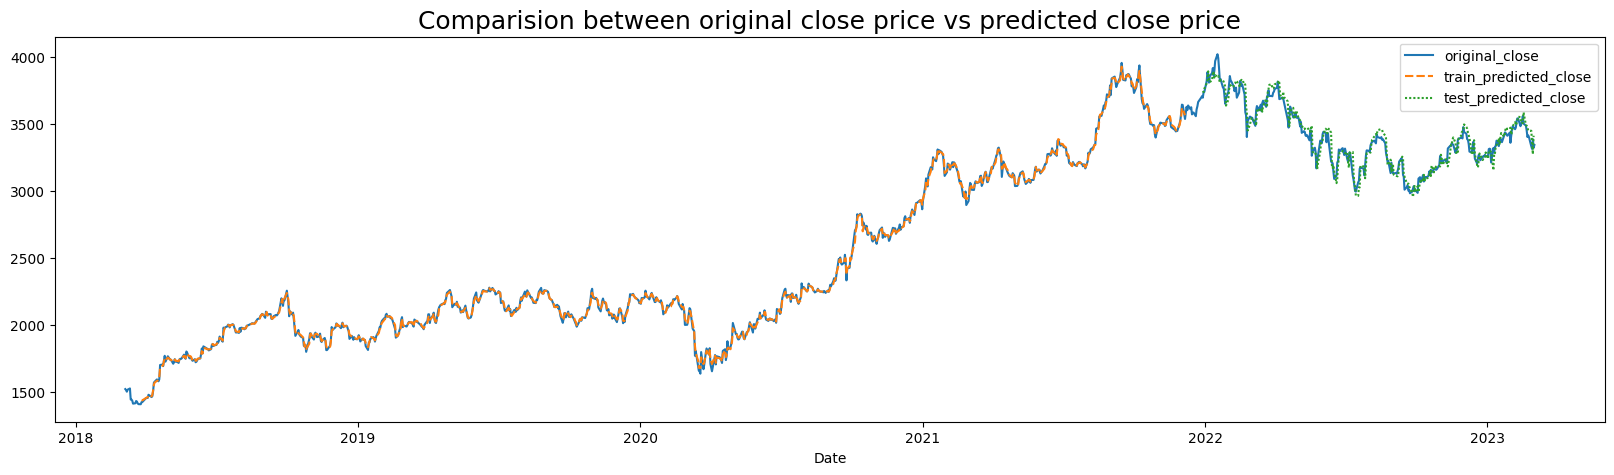

In [49]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [50]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.7367109723632052, 0.7355765805450756, 0.7334426292302687, 0.730043284239558, 0.7150579357631246, 0.7127713404707641, 0.7141068316319692, 0.7143824334935747, 0.7163846168578709, 0.715961159098309]


In [51]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

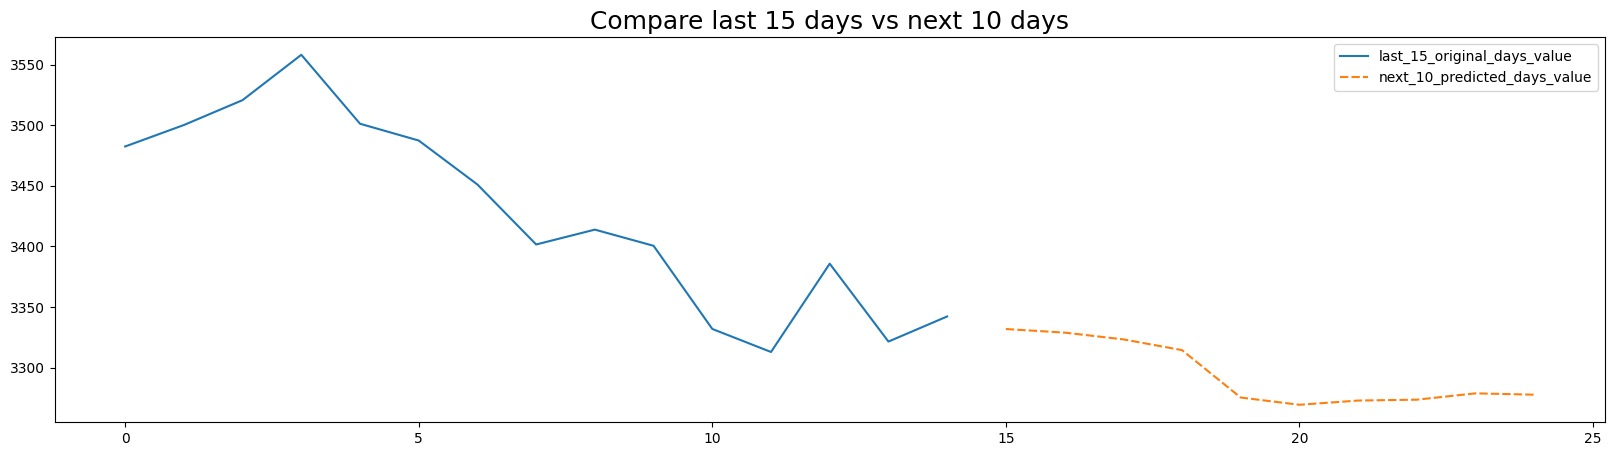

In [52]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

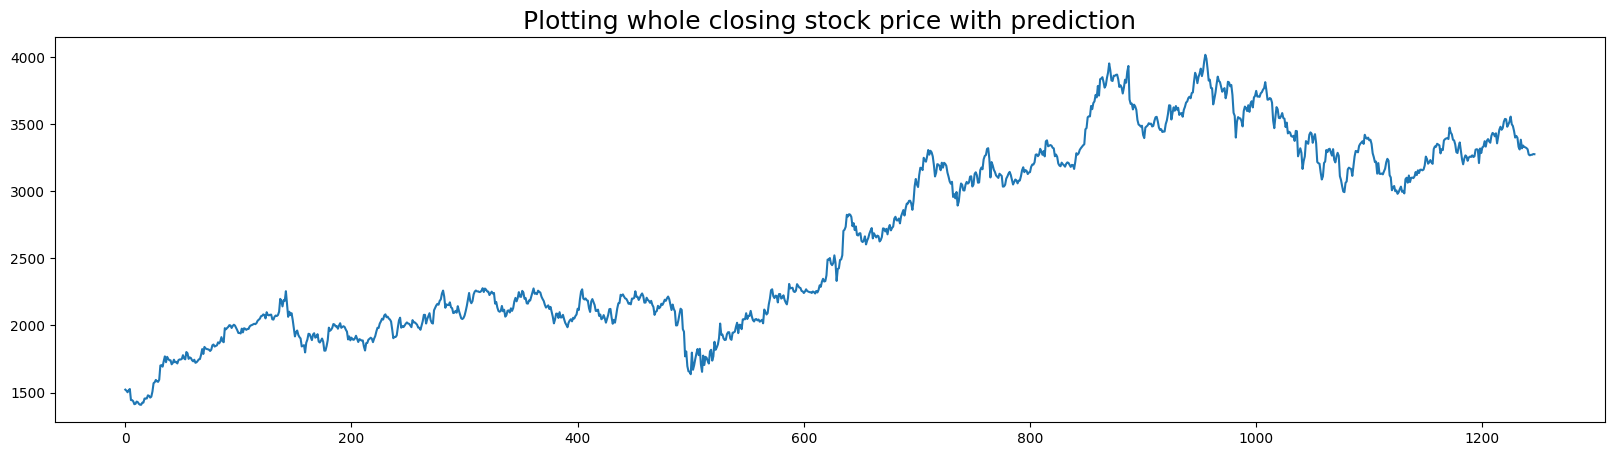

In [53]:
# Creating list of close price
rfdf=closedf.tolist()
# Adding next 10 days prediction
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=rfdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **K Nearest Neighbors (KNN)**
* K Nearest Neighbors (KNN) is a type of non-parametric algorithm used for regression and classification problems. The KNN regression algorithm is called the K Neighbors Regressor.

* In KNN regression, the prediction for a new data point is based on the K-nearest neighbors of that data point in the training dataset. The K neighbors are the K training data points that are closest to the new data point based on some distance metric, such as Euclidean distance. The prediction for the new data point is then computed as the average of the output values of the K nearest neighbors.

* KNN regression can be useful when there is no clear functional relationship between the input and output variables, and the data has complex patterns that are difficult to model with linear regression or other parametric models. However, KNN regression can be sensitive to outliers, and the choice of the value of K can have a significant impact on the accuracy of the predictions.






In [54]:
from sklearn import neighbors
K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [55]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (911, 1)
Test data prediction: (294, 1)


In [56]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [57]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  50.53741653925104
Train data MSE:  2554.0304704617647
Test data MAE:  36.936248079034044
---------------------------------------------------------------------------------------------------------
Test data RMSE:  82.47881243082973
Test data MSE:  6802.754499999993
Test data MAE:  63.24551020408162
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9928536460018497
Test data explained variance regression score: 0.8787504170378335
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9928423268818604
Test data R2 score: 0.8779761017817778
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.00047200180232119206
Test dat

Train predicted data:  (1237, 1)
Test predicted data:  (1237, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

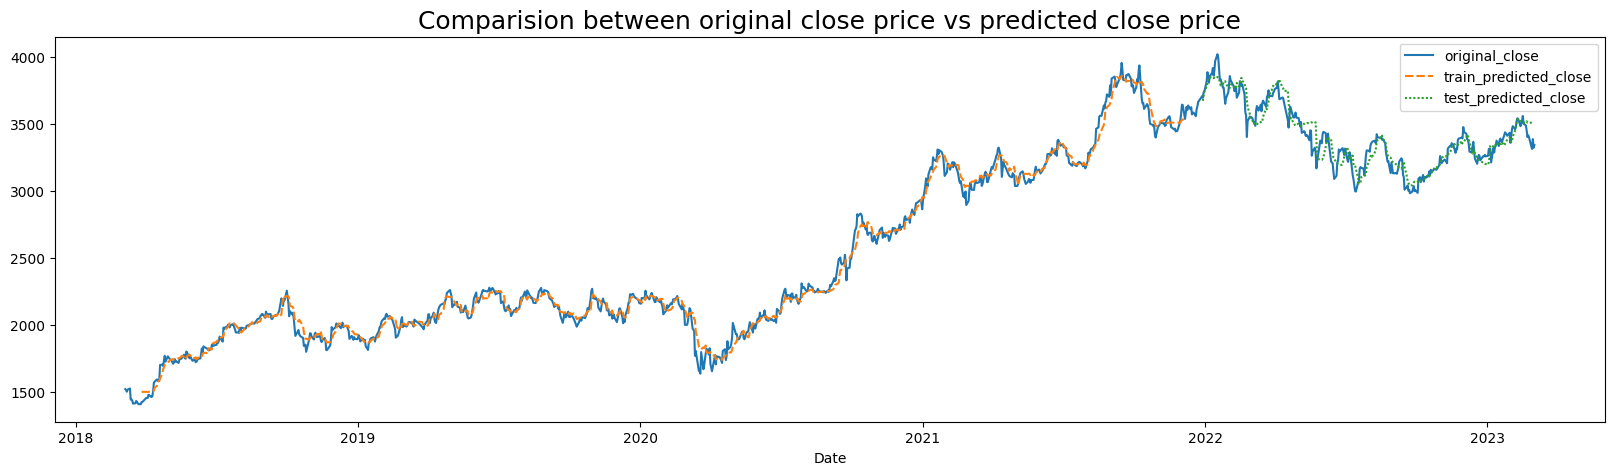

In [58]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [59]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.8042339391850051, 0.8116216267979238, 0.8142710308416166, 0.8150077566889472, 0.8129112162360587, 0.8189722865952923, 0.8222996827099255, 0.826432753018086, 0.8291587663353315, 0.8291587663353315]


In [60]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

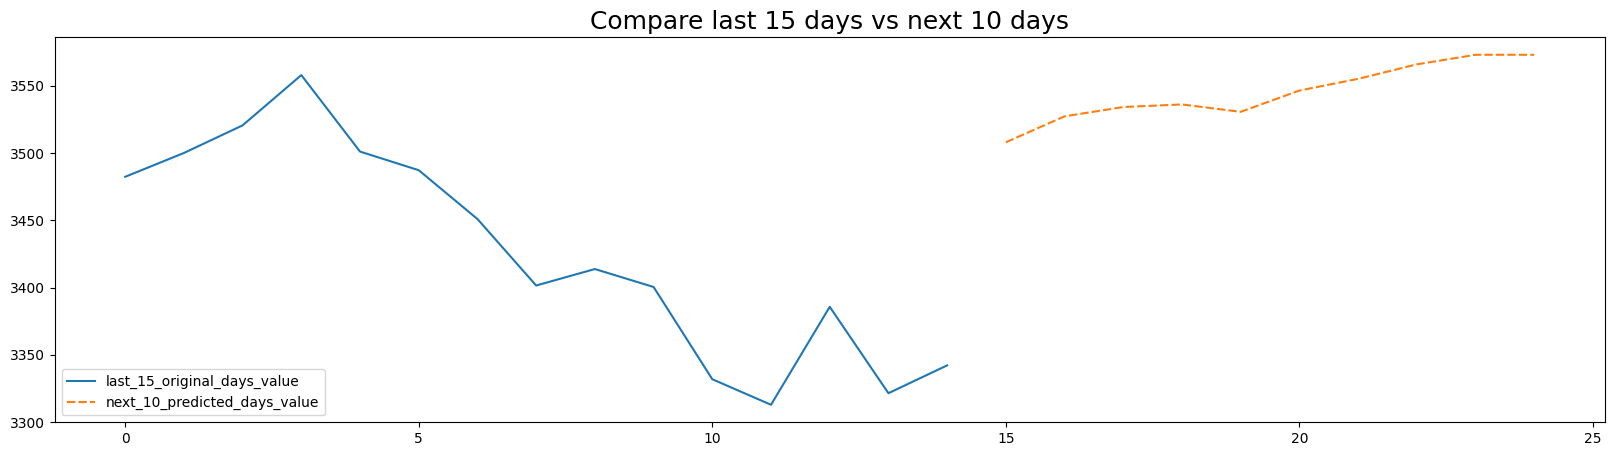

In [61]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

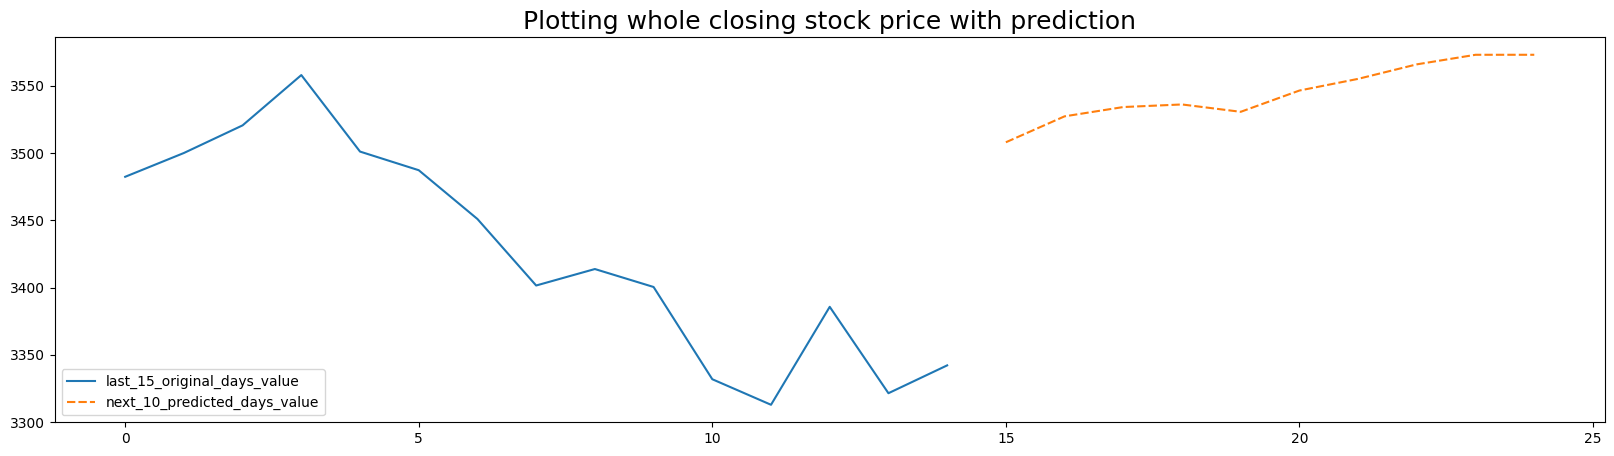

In [62]:
# Creating list of close price
knndf=closedf.tolist()
# Adding next 10 days prediction
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **Long short-term memory (LSTM)**

* LSTM (Long Short-Term Memory) is a deep learning model that is commonly used in the field of natural language processing,time series forecasting, speech recognition, and image classification. It is a type of recurrent neural network (RNN) that is designed to address the vanishing gradient problem, which occurs when RNNs are unable to effectively propagate error gradients over time.

* LSTM has the ability to selectively remember or forget previous inputs based on their relevance to the current output, allowing it to maintain long-term dependencies in sequential data. It consists of a memory cell, an input gate, an output gate, and a forget gate, each of which controls the flow of information within the network.

* The LSTM model has proven to be effective in a variety of applications, including language translation, sentiment analysis, and speech recognition. It has also been used in predictive maintenance, financial forecasting, and other areas that involve time-series data.

* Overall, LSTM is a powerful deep learning model that is well-suited for tasks that involve sequential data and long-term dependencies.

In [63]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# LSTM requies 3-dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (911, 15, 1)
X_test:  (294, 15, 1)


#### **Sequential Model**

* In deep learning, a sequential model is a type of **neural network architecture** in which the layers are arranged sequentially, or one after the other, **with no branching**. This means that the output of each layer is fed as input to the next layer, in a chain-like sequence.

* The sequential model is a popular choice for many deep learning applications, as it is simple and easy to use. However, it may not be appropriate for all types of problems, such as those that require more complex network architectures with multiple inputs or outputs. In those cases, other types of neural network architectures, such as recurrent neural networks or convolutional neural networks, may be more appropriate.

**1.Input shape:** This parameter defines the shape of the input data that is fed to the LSTM network. In Keras, the input shape is specified as a tuple that contains the number of time steps in the sequence and the number of input features in each time step.

**2.Number of hidden units:** This parameter determines the number of hidden units in the LSTM layer. More hidden units generally allow the network to capture more complex patterns in the input data, but also require more computational resources.

**3.Activation function:** This parameter determines the activation function used in the LSTM layer. The most commonly used activation functions in LSTM are the hyperbolic tangent (tanh) function and the sigmoid function. The activation function is used to control the output of the LSTM cell and can help to prevent vanishing or exploding gradients during training.

**4.Dropout:** This parameter is used to prevent overfitting in the LSTM network by randomly dropping out some of the LSTM units during training.

**5.Recurrent dropout:** This parameter is similar to the dropout parameter, but is used to randomly drop out some of the connections between the LSTM cells during training.

**6.Number of time steps:** This parameter determines the number of time steps in the input sequence. In many applications, the number of time steps is fixed, but it can also be variable.

**7.Batch size:** This parameter determines the number of samples in each training batch. A larger batch size can help to speed up training, but can also require more memory.

**8.Learning rate:** This parameter determines the step size used in the optimization algorithm during training. A smaller learning rate can help to prevent overshooting the optimal solution, but can also make the training process slower.

In [64]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 15, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 15, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,025 (82.13 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

#### **Epochs**
An epoch is a complete pass through the training data during the training of a model. During each epoch, the model processes every sample in the training dataset, updates its parameters (weights and biases), and tries to minimize the loss function.

In [66]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10


183/183 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0383 - val_loss: 0.0031
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0029 - val_loss: 0.0034
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9.7218e-04 - val_loss: 0.0013
Epoch 10/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0011 - val_loss: 0.0011


In [67]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


((911, 1), (294, 1))

In [68]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [69]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  74.09242421581231
Train data MSE:  5489.687326175892
Test data MAE:  56.760136799147574
---------------------------------------------------------------------------------------------------------
Test data RMSE:  84.84666366235778
Test data MSE:  7198.956334633265
Test data MAE:  67.8819091796875
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9852861402862781
Test data explained variance regression score: 0.8708874794782648
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9846151454119274
Test data R2 score: 0.8708692611125808
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.0010436580312576484
Test data M

Train predicted data:  (1237, 1)
Test predicted data:  (1237, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

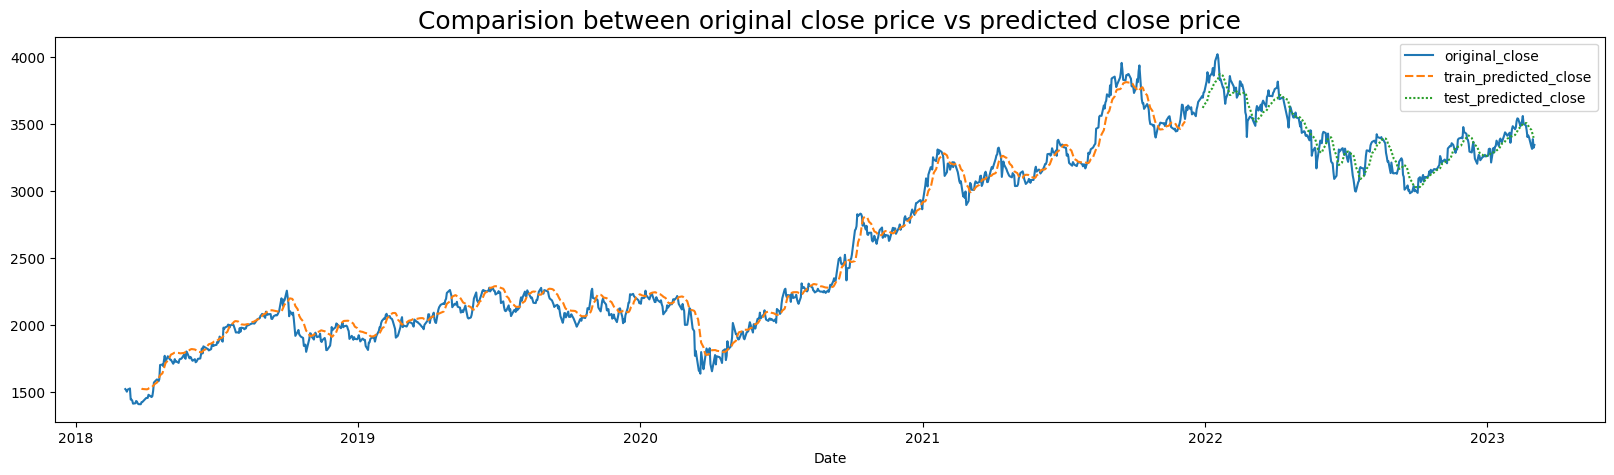

In [70]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [71]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(np.expand_dims(x_input, 2))
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0])
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model.predict(np.expand_dims(x_input, 2))
        temp_input.extend(yhat[0])
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Output of predicted next days:  10
Output of predicted next days:  [[0.7503105401992798], [0.7473880052566528], [0.7459480166435242], [0.745448887348175], [0.7454906105995178], [0.7457055449485779], [0.7459998726844788], [0.7462806105613708], [0.746508777141571], [0.7467445731163025]]


In [72]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

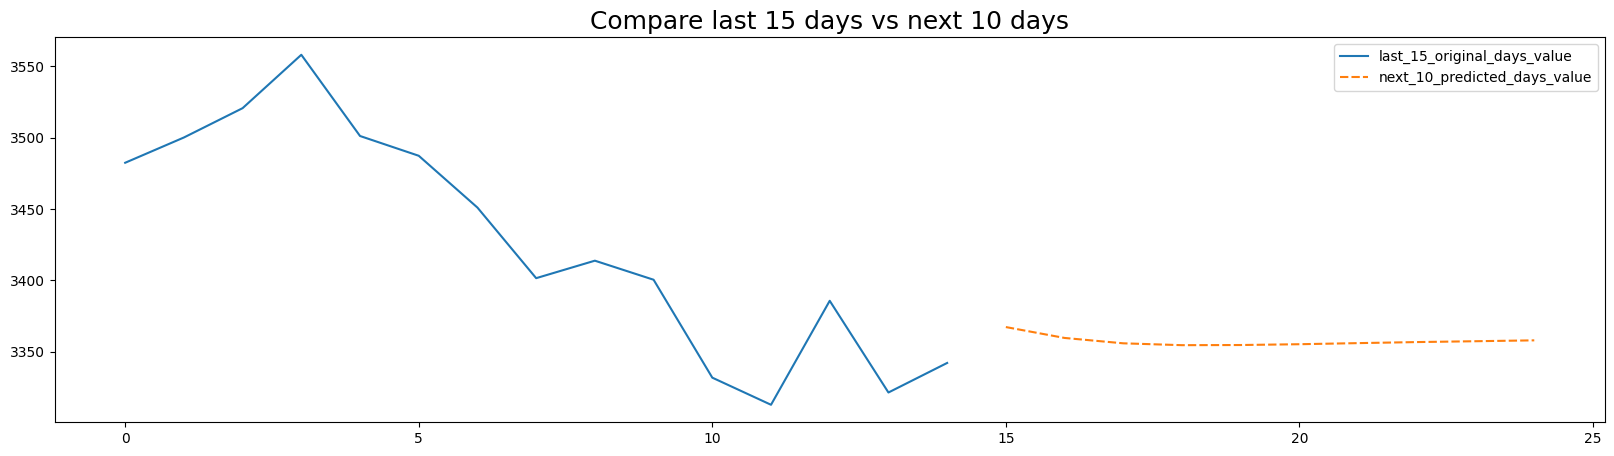

In [73]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

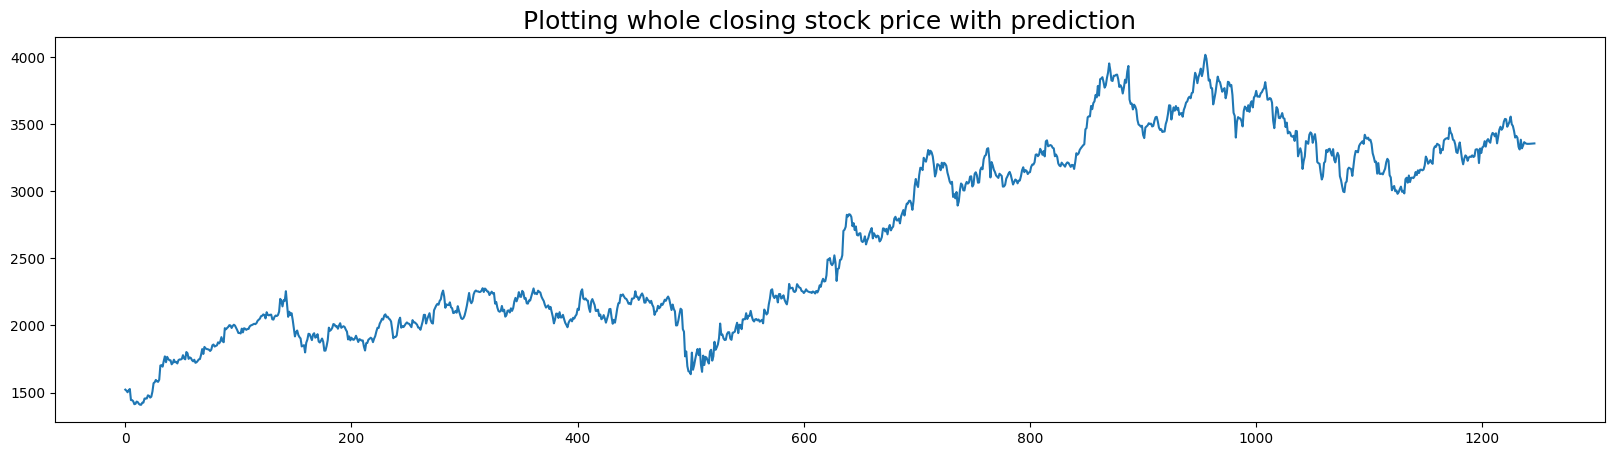

In [74]:
# Creating list of close price
lstmdf=closedf.tolist()
# Adding next 10 days prediction
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=lstmdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

####**Save and load model**
**Hierarchical Data Format version 5**

*The HDF5 (Hierarchical Data Format version 5),  format is designed to store large and complex datasets, and it provides a way to store and organize data in a hierarchical structure. In the context of deep learning, the .h5 file contains the weights and architecture of the trained model, along with any other relevant information such as the optimizer state and the training configuration.*

In [75]:
model.save('lstm_model.h5')
lstm_model = tf.keras.models.load_model('lstm_model.h5')

In [76]:
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 15, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 15, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,027 (82.14 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### **GRU**
* The GRU (Gated Recurrent Unit) Deep Learning model is a type of artificial neural network that is used for sequence data processing. 
* This model is similar to the LSTM (Long Short-Term Memory) model and is designed to overcome some of the issues associated with LSTM. 
* GRU networks have fewer parameters than LSTM networks, which makes them faster to train and more memory-efficient. 
* The main difference between the two models is that GRU has fewer gates to control the flow of information and therefore, it is less prone to overfitting. 
* The GRU model is widely used in various applications, such as natural language processing, speech recognition, image recognition, and music analysis. 
* It is capable of learning long-term dependencies in the data and can model sequences with arbitrary lengths. In conclusion, the GRU Deep Learning model is a powerful tool for processing sequence data and has proven to be effective in various real-world applications.

In [77]:
# reshape input to be [samples, time steps, features] which is required for LSTM
#  GRU requires 3-Dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (911, 15, 1)
X_test:  (294, 15, 1)


In [78]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 15, 32)         │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 15, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 15, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,401 (87.50 KB)

 Trainable params: 22,401 (87.50 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10


183/183 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 0.0249 - val_loss: 0.0011
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 9.6174e-04 - val_loss: 0.0012
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 7.7498e-04 - val_loss: 0.0019
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 7.0199e-04 - val_loss: 6.5934e-04
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.8847e-04 - val_loss: 0.0016
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.0177e-04 - val_loss: 4.8693e-04
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.0386e-04 - val_loss: 9.0344e-04
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.6463e-04 - val_loss: 0.0010
Epoch 9/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 4.6095e-04 - val_loss: 3.6934e-04
Epoch 10/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.4660e-04 - val_loss: 0.0015


In [81]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


((911, 1), (294, 1))

In [82]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [83]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  60.990781898053214
Train data MSE:  3719.8754765358954
Test data MAE:  46.07746614190278
---------------------------------------------------------------------------------------------------------
Test data RMSE:  102.14861664857703
Test data MSE:  10434.33988321795
Test data MAE:  89.69039630500636
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9900456669475902
Test data explained variance regression score: 0.9517458486339837
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9895750450086
Test data R2 score: 0.8128348115628566
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.000572351442013899
Test data MG

Train predicted data:  (1237, 1)
Test predicted data:  (1237, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

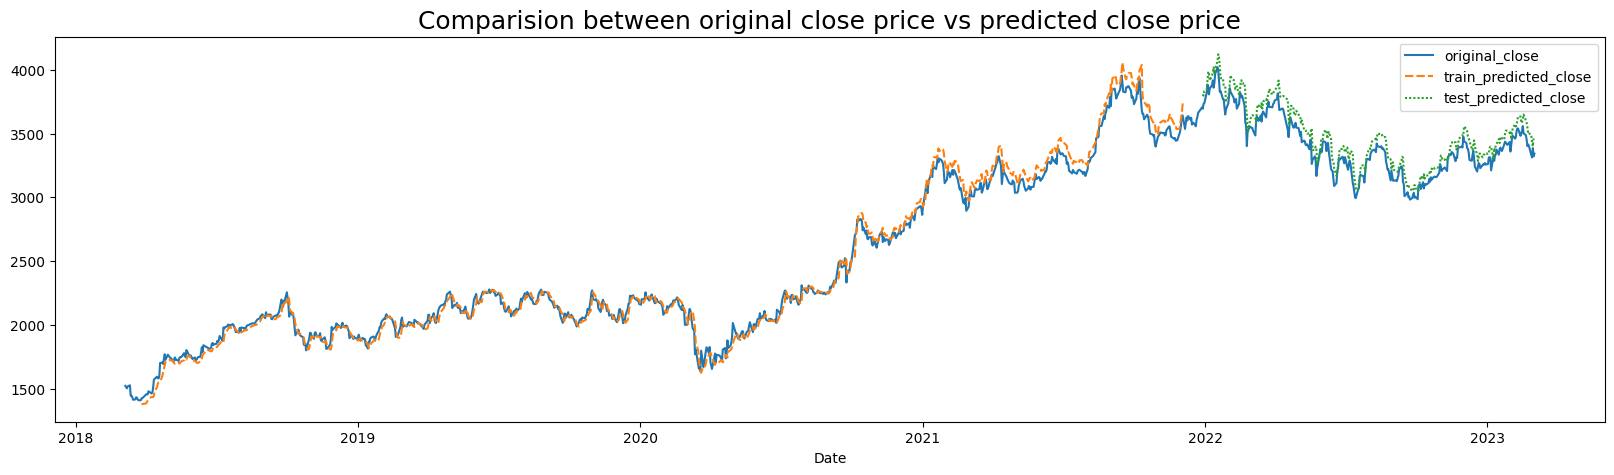

In [84]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [85]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = model.predict(np.expand_dims(x_input, 2))
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0])
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model.predict(np.expand_dims(x_input, 2))
        
        temp_input.extend(yhat[0])
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Output of predicted next days:  10
Output of predicted next days:  [[0.7727944254875183], [0.8022773861885071], [0.8342265486717224], [0.868419349193573], [0.9043002128601074], [0.9415639042854309], [0.9798970222473145], [1.018912434577942], [1.058142900466919], [1.0970568656921387]]


In [86]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

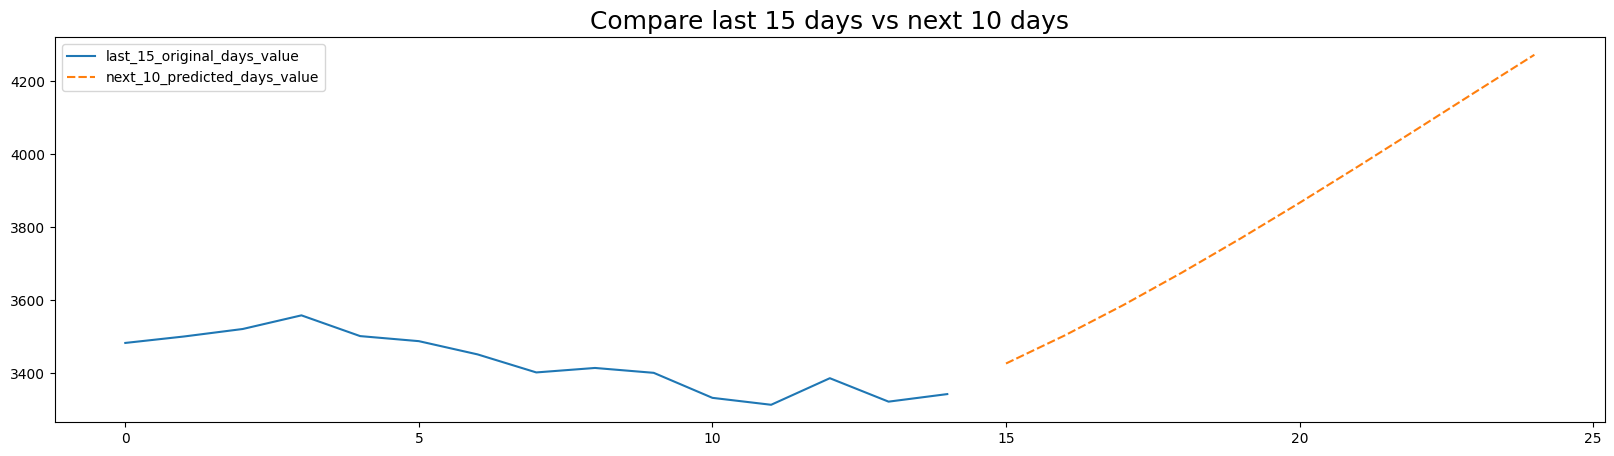

In [87]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

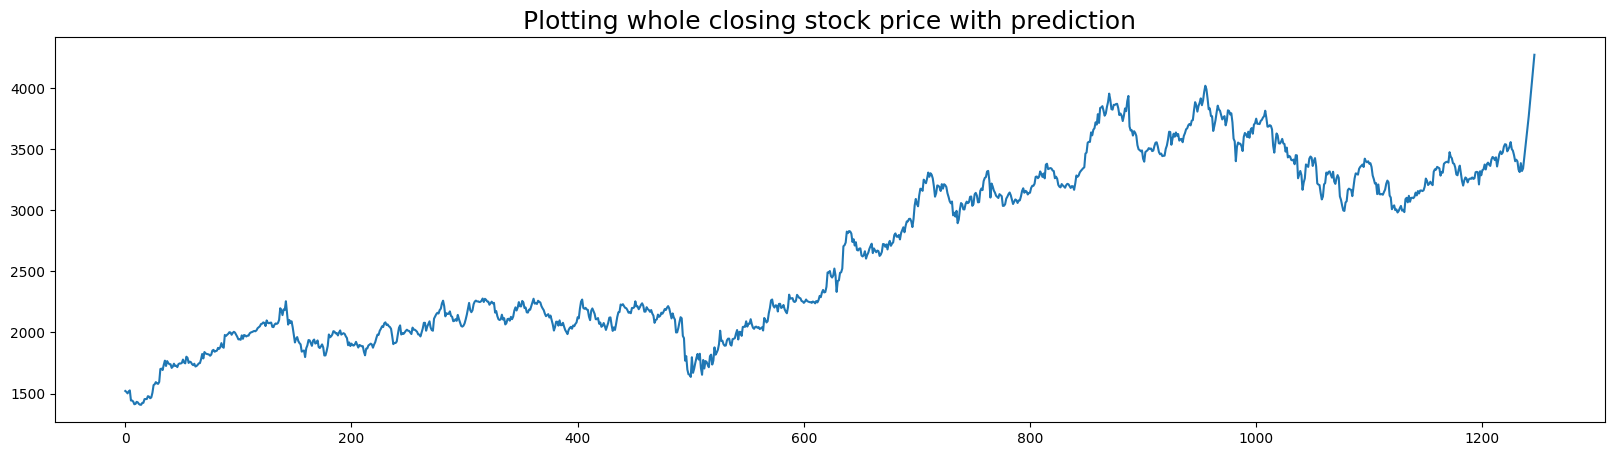

In [88]:
# Creating list of close price
grudf=closedf.tolist()
# Adding next 10 days prediction
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=grudf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

In [89]:
model.save('gru_model.h5')
gru_model = tf.keras.models.load_model('gru_model.h5')

In [90]:
gru_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 15, 32)         │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 15, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 15, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,403 (87.52 KB)

 Trainable params: 22,401 (87.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## **Yahoo finance github link and syntax:**
* https://github.com/ranaroussi/yfinance

```
import yfinance as yf

adanient = yf.Ticker("TCS.NS")

# get all stock info (slow)
TCS.info
# fast access to subset of stock info (opportunistic)
# msft.fast_info

# get historical market data
# hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
# msft.history_metadata

# show actions (dividends, splits, capital gains)
# msft.actions
# msft.dividends
# msft.splits
# msft.capital_gains  # only for mutual funds & etfs

# show share count
# - yearly summary:
# msft.shares
# - accurate time-series count:

# show financials:
# - income statement
# msft.income_stmt
# msft.quarterly_income_stmt
# - balance sheet
# msft.balance_sheet
# msft.quarterly_balance_sheet
```

# **<center>THE END</center>**